In [1]:
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere
from qiskit_textbook.widgets import plot_bloch_vector_spherical
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# Create your circuit below


In [3]:
circuit = QuantumCircuit(4)
circuit.h(range(4))
for i in range(4):
    circuit.ry(Parameter("c_"+str(i)),i)
circuit.barrier()

### The following segment will output the latex code you need to insert into your latex document. Make sure that the imports are done correctly!


In [4]:
print(circuit_drawer(circuit, output="latex_source"))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_0})} \barrier[0em]{3} & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_1})} & \qw & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_2})} & \qw & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_3})} & \qw & \qw & \qw\\
\\ }}
\end{document}


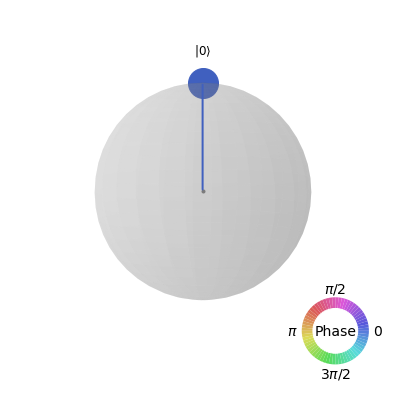

In [7]:
state = Statevector.from_instruction(QuantumCircuit(1))
fig = plot_state_qsphere(state)
display(fig)
fig.savefig('../thesis/Appendices/Q_Sphere_State_0.svg')

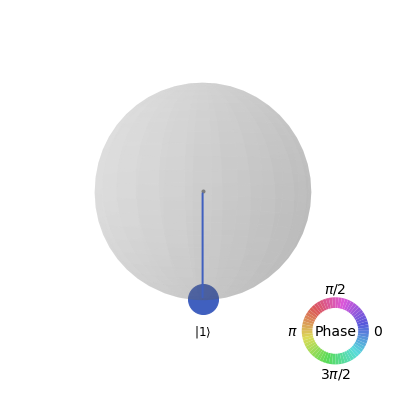

In [6]:
qc = QuantumCircuit(1)
qc.x(0)
state = Statevector.from_instruction(qc)
fig = plot_state_qsphere(state)
display(fig)
fig.savefig('../thesis/Appendices/Q_Sphere_State_1.svg')

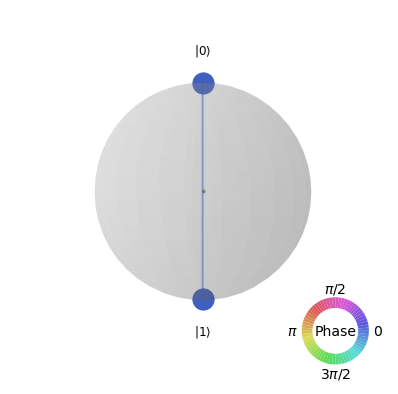

In [8]:
qc = QuantumCircuit(1)
qc.h(0)
state = Statevector.from_instruction(qc)
fig = plot_state_qsphere(state)
display(fig)
fig.savefig('../thesis/Appendices/Q_Sphere_State_h.svg')

#### Use this to generate histograms

In [7]:
counts = {}
counts[0] = 547
counts[1] = 987

fig = plot_histogram(counts)
fig.savefig('../thesis/Appendices/example_histogram.svg', type="svg")

/tmp/ipykernel_685/2013565266.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('../thesis/Appendices/example_histogram.svg', type="svg")


#### Use this to plot bloch sphere with a vector

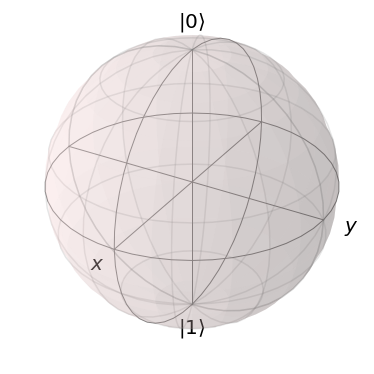

/tmp/ipykernel_685/3823323065.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('../thesis/Appendices/Bloch_Sphere_axis.svg', type="svg")


In [19]:
vector = [0,0,0]
fig = plot_bloch_vector_spherical(vector)
display(fig)
fig.savefig('../thesis/Appendices/Bloch_Sphere_axis.svg', type="svg")

In [9]:
circuit = QuantumCircuit(1)
circuit.ry(1.8608, 0)
backend = Aer.get_backend('qasm_simulator')

circuit.measure_all()
job = backend.run(transpile(circuit, backend), shots=5000000)

result = job.result()
counts=result.get_counts(circuit)
fig = plot_histogram(counts)

fig.savefig('../thesis/Appendices/calculated_circuit_histogram.svg', type="svg")

/tmp/ipykernel_970/890443297.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('../thesis/Appendices/calculated_circuit_histogram.svg', type="svg")
